In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import ast

data = pd.read_csv('movies_metadata.csv',skiprows=[19730, 19731, 29503, 29504, 35587, 35588], usecols=['id', 'original_title','original_language','genres', 'production_companies', 'production_countries', 'runtime', 'vote_average'])
data = data.drop_duplicates(subset=['id'], ignore_index=True)
for i, row in data.iterrows():
    genres = ast.literal_eval(data['genres'][i])
    genreList = []
    for genre in genres:
        genreList.append(genre['name'])
    data.at[i, 'genres'] = genreList
    
    
    companies = ast.literal_eval(data['production_companies'][i])
    companiesList = []
    for company in companies:
        companiesList.append(company['name'])
    data.at[i, 'production_companies'] = companiesList
    
    
    countries = ast.literal_eval(data['production_countries'][i])
    countriesList = []
    for country in countries:
        countriesList.append(country['name'])
    data.at[i, 'production_countries'] = countriesList
data

,genres,id,original_language,original_title,production_companies,production_countries,runtime,vote_average
0,"[Animation, Comedy, Family]",862,en,Toy Story,[Pixar Animation Studios],[United States of America],81.0,7.7
1,"[Adventure, Fantasy, Family]",8844,en,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,6.9
2,"[Romance, Comedy]",15602,en,Grumpier Old Men,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,6.5
3,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,[Twentieth Century Fox Film Corporation],[United States of America],127.0,6.1
4,[Comedy],11862,en,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,5.7
...,...,...,...,...,...,...,...,...
45425,"[Drama, Family]",439050,fa,رگ خواب,[],[Iran],90.0,4.0
45426,[Drama],111109,tl,Siglo ng Pagluluwal,[Sine Olivia],[Philippines],360.0,9.0
45427,"[Action, Drama, Thriller]",67758,en,Betrayal,[American World Pictures],[United States of America],90.0,3.8
45428,[],227506,en,Satana likuyushchiy,[Yermoliev],[Russia],87.0,0.0


In [2]:
data.drop(data[data['vote_average'] == 0.0].index, inplace=True)
data

,genres,id,original_language,original_title,production_companies,production_countries,runtime,vote_average
0,"[Animation, Comedy, Family]",862,en,Toy Story,[Pixar Animation Studios],[United States of America],81.0,7.7
1,"[Adventure, Fantasy, Family]",8844,en,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,6.9
2,"[Romance, Comedy]",15602,en,Grumpier Old Men,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,6.5
3,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,[Twentieth Century Fox Film Corporation],[United States of America],127.0,6.1
4,[Comedy],11862,en,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,5.7
...,...,...,...,...,...,...,...,...
45423,[Science Fiction],222848,en,Caged Heat 3000,[Concorde-New Horizons],[United States of America],85.0,3.5
45424,"[Drama, Action, Romance]",30840,en,Robin Hood,"[Westdeutscher Rundfunk (WDR), Working Title F...","[Canada, Germany, United Kingdom, United State...",104.0,5.7
45425,"[Drama, Family]",439050,fa,رگ خواب,[],[Iran],90.0,4.0
45426,[Drama],111109,tl,Siglo ng Pagluluwal,[Sine Olivia],[Philippines],360.0,9.0


array([<AxesSubplot:title={'center':'0'}>], dtype=object)

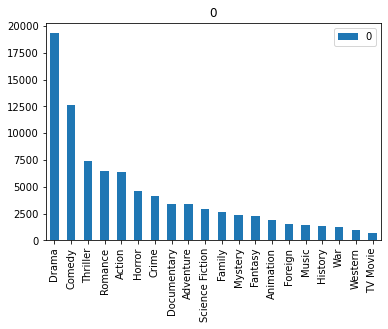

In [3]:
import ast

genres = []
for i in data['genres']:
    for j in i:
        genres.append(j)
pd.DataFrame(genres).apply(pd.value_counts).plot(kind='bar', subplots=True)


array([<AxesSubplot:title={'center':'0'}>], dtype=object)

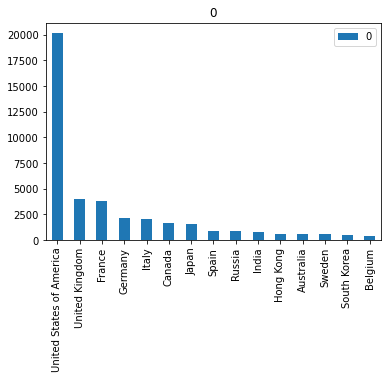

In [4]:
import ast

production_countries = []
for i in data['production_countries']:
    for j in i:
        production_countries.append(j)
pd.DataFrame(production_countries).apply(pd.value_counts)[:15].plot(kind='bar', subplots=True)
#pd.DataFrame(companies)

array([<AxesSubplot:title={'center':'0'}>], dtype=object)

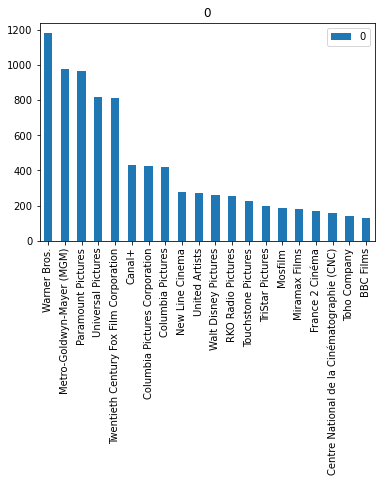

In [5]:
import ast

production_companies = []
for i in data['production_companies']:
    for j in i:
        production_companies.append(j)
pd.DataFrame(production_companies).apply(pd.value_counts)[:20].plot(kind='bar', subplots=True)


In [39]:
credit = pd.read_csv('credits.csv', usecols=['crew','id'])
data_with_crew = data.merge(credit, on='id')
for i, row in data_with_crew.iterrows():
    crew = ast.literal_eval(data_with_crew['crew'][i])
    director = ""
    for crewmember in crew:
        if crewmember['job'] == 'Director':
            director = crewmember['name']
    data_with_crew.at[i, 'crew'] = director
data_with_crew.rename(columns = {'crew':'director'}, inplace = True)
data_with_crew

,genres,id,original_language,original_title,production_companies,production_countries,runtime,vote_average,director
0,"[Animation, Comedy, Family]",862,en,Toy Story,[Pixar Animation Studios],[United States of America],81.0,7.7,John Lasseter
1,"[Adventure, Fantasy, Family]",8844,en,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,6.9,Joe Johnston
2,"[Romance, Comedy]",15602,en,Grumpier Old Men,"[Warner Bros., Lancaster Gate]",[United States of America],101.0,6.5,Howard Deutch
3,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,[Twentieth Century Fox Film Corporation],[United States of America],127.0,6.1,Forest Whitaker
4,[Comedy],11862,en,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]",[United States of America],106.0,5.7,Charles Shyer
...,...,...,...,...,...,...,...,...,...
42470,[Science Fiction],222848,en,Caged Heat 3000,[Concorde-New Horizons],[United States of America],85.0,3.5,Aaron Osborne
42471,"[Drama, Action, Romance]",30840,en,Robin Hood,"[Westdeutscher Rundfunk (WDR), Working Title F...","[Canada, Germany, United Kingdom, United State...",104.0,5.7,John Irvin
42472,"[Drama, Family]",439050,fa,رگ خواب,[],[Iran],90.0,4.0,Hamid Nematollah
42473,[Drama],111109,tl,Siglo ng Pagluluwal,[Sine Olivia],[Philippines],360.0,9.0,Lav Diaz
